## Background 
### semiconductor_data

The data comes from [CHIP Dataset](https://chip-dataset.vercel.app/).

- [Moore's Law](https://www.synopsys.com/glossary/what-is-moores-law.html#:~:text=Definition,as%20E%20%3D%20mc2).)
- [Wikipedia - Moore's Law](https://en.wikipedia.org/wiki/Moore%27s_law)

> Moore's law is the observation that the number of transistors in a dense integrated circuit (IC) doubles about every two years. Moore's law is an observation and projection of a historical trend. Rather than a law of physics, it is an empirical relationship linked to gains from experience in production.

Paper for citation: [Summarizing CPU and GPU Design Trends with Product Data](https://arxiv.org/abs/1911.11313)

Note that the authors prohibit resharing the dataset, we have a simple summary. You can easily download the full dataset at the bottom of: <https://chip-dataset.vercel.app/>

# In this Notebook we will explore the following tasks
We will practice data cleaning skills on the main data (not the summarized version) by perfoming the following tasks: 
1. Explore the missingness in the dataset for categorical and numerical data
2. Develop a strategy to deal with the missing values, i.e deletion, imputation by mean or mode etc, whilst providing rationale for your approach.
3. Drop non-consequntial fields
4. Transform temporal data to their corrrect format (date time) 
5. Perfom a full EDA and demonstrate the validity of the following assumptions 
> - Moore's Law still holds, especially in GPUs.
> - Dannard Scaling is still valid in general.
> - CPUs have higher frequencies, but GPUs are catching up.
> - GPU performance doubles every 1.5 years.
> - GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.
> - High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.
> - Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors
> - TSMC makes the highest number of chips in the world

6. Calculate and visualized the correlation among the features
7. Perfom the correct encoding for your data, in readiness for modelling. 

# bonus task 

Since it is your first week of ML, it is okay if you do not proceed to this section, however, if you feel adventureous, you can explore a classification model to predict whether a product is a GPU or a CPU based on the other independent variables. 
- Compare the perfomance of a Random Forest Classifier with that of a Logistic Regression Model


# data dictionary

# `semiconductor-chips.csv`

|variable                 |class     |description |
|:------------------------|:---------|:-----------|
|date                     |double    |Date of release    |
|type                     |character |Type of chip    |
|foundry                  |character | Creator    |
|vendor                   |character | Vendor    |
|process_size_nm_mean     |double    | Process size in nanometer    |
|process_size_nm_sd       |double    |    Process size in nanometer |
|tdp_w_mean               |double    | Thermal design profile    |
|tdp_w_sd                 |double    |Thermal design profile    |
|die_size_mm_2_mean       |double    | Die size in millimeters^2    |
|die_size_mm_2_sd         |double    |Die size in millimeters^2    |
|transistors_million_mean |double    | Transitor count in millions    |
|transistors_million_sd   |double    |Transitor count in millions    |
|freq_m_hz_mean           |double    | Frequency (Mhz)    |
|freq_m_hz_sd             |double    |Frequency (Mhz)    |
|n                        |integer   | Total number of observations for date, type, foundry, vendor grouping    |



## EDA

In [1]:
# Importing Libaries to Use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Importing the data ( Note I am working with the full file data here)
chipdata = pd.read_csv(r"C:\Users\DE737AP\Downloads\chip_dataset.csv")
chipdata.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [5]:
chipdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

In [4]:
# Understanding My data 
chipdata.describe()

,Unnamed: 0,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
count,4854.000000,4845.000000,4228.000000,4139.000000,4143.000000,4854.000000,536.000000,1948.000000,1306.000000
mean,2426.500000,55.109598,81.359981,188.440445,1929.922279,1484.406057,8397.459851,2134.756653,363.670511
std,1401.373433,44.998676,76.807808,126.189383,4044.891098,1066.701523,13799.551131,3898.431487,1145.931856
min,0.000000,0.000000,1.000000,1.000000,8.000000,100.000000,10.020000,12.800000,3.600000
25%,1213.250000,22.000000,33.000000,104.000000,154.000000,590.000000,768.800000,257.300000,38.295000
50%,2426.500000,40.000000,65.000000,148.000000,624.000000,1073.500000,2965.500000,696.000000,89.280000
75%,3639.750000,90.000000,100.000000,239.000000,1550.000000,2400.000000,10600.000000,2116.750000,220.000000
max,4853.000000,250.000000,900.000000,826.000000,54200.000000,4700.000000,184600.000000,40000.000000,11540.000000


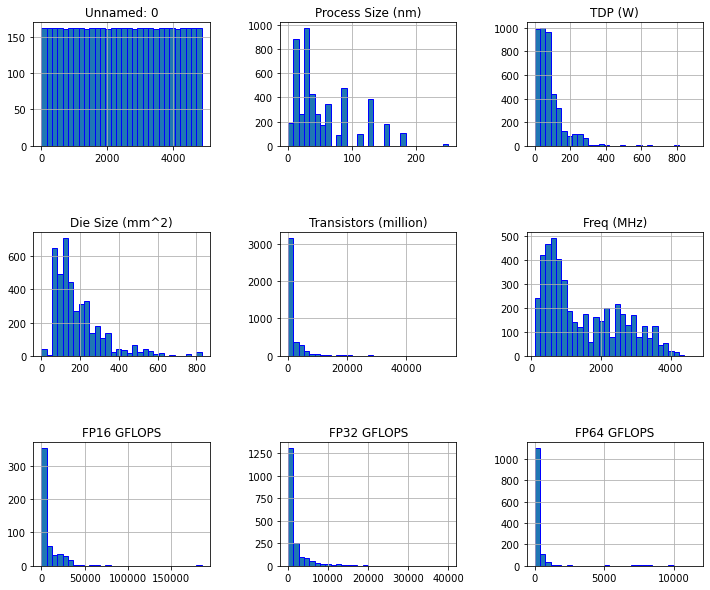

In [6]:
chipdata.hist(figsize=(12, 10), bins=30, edgecolor="blue")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

### Insights from Exploration 
- Comparing the max and 75% values, we can see a huge difference. It confirms the intuitions that there are a couple of extreme values in Process Size, TDP, Die Size, Transistors, Freq (MHz)	
- Process Size has a uniform distribution 
- The range of data is large for the following : Tansistors,GFLOPS (16,32,64)

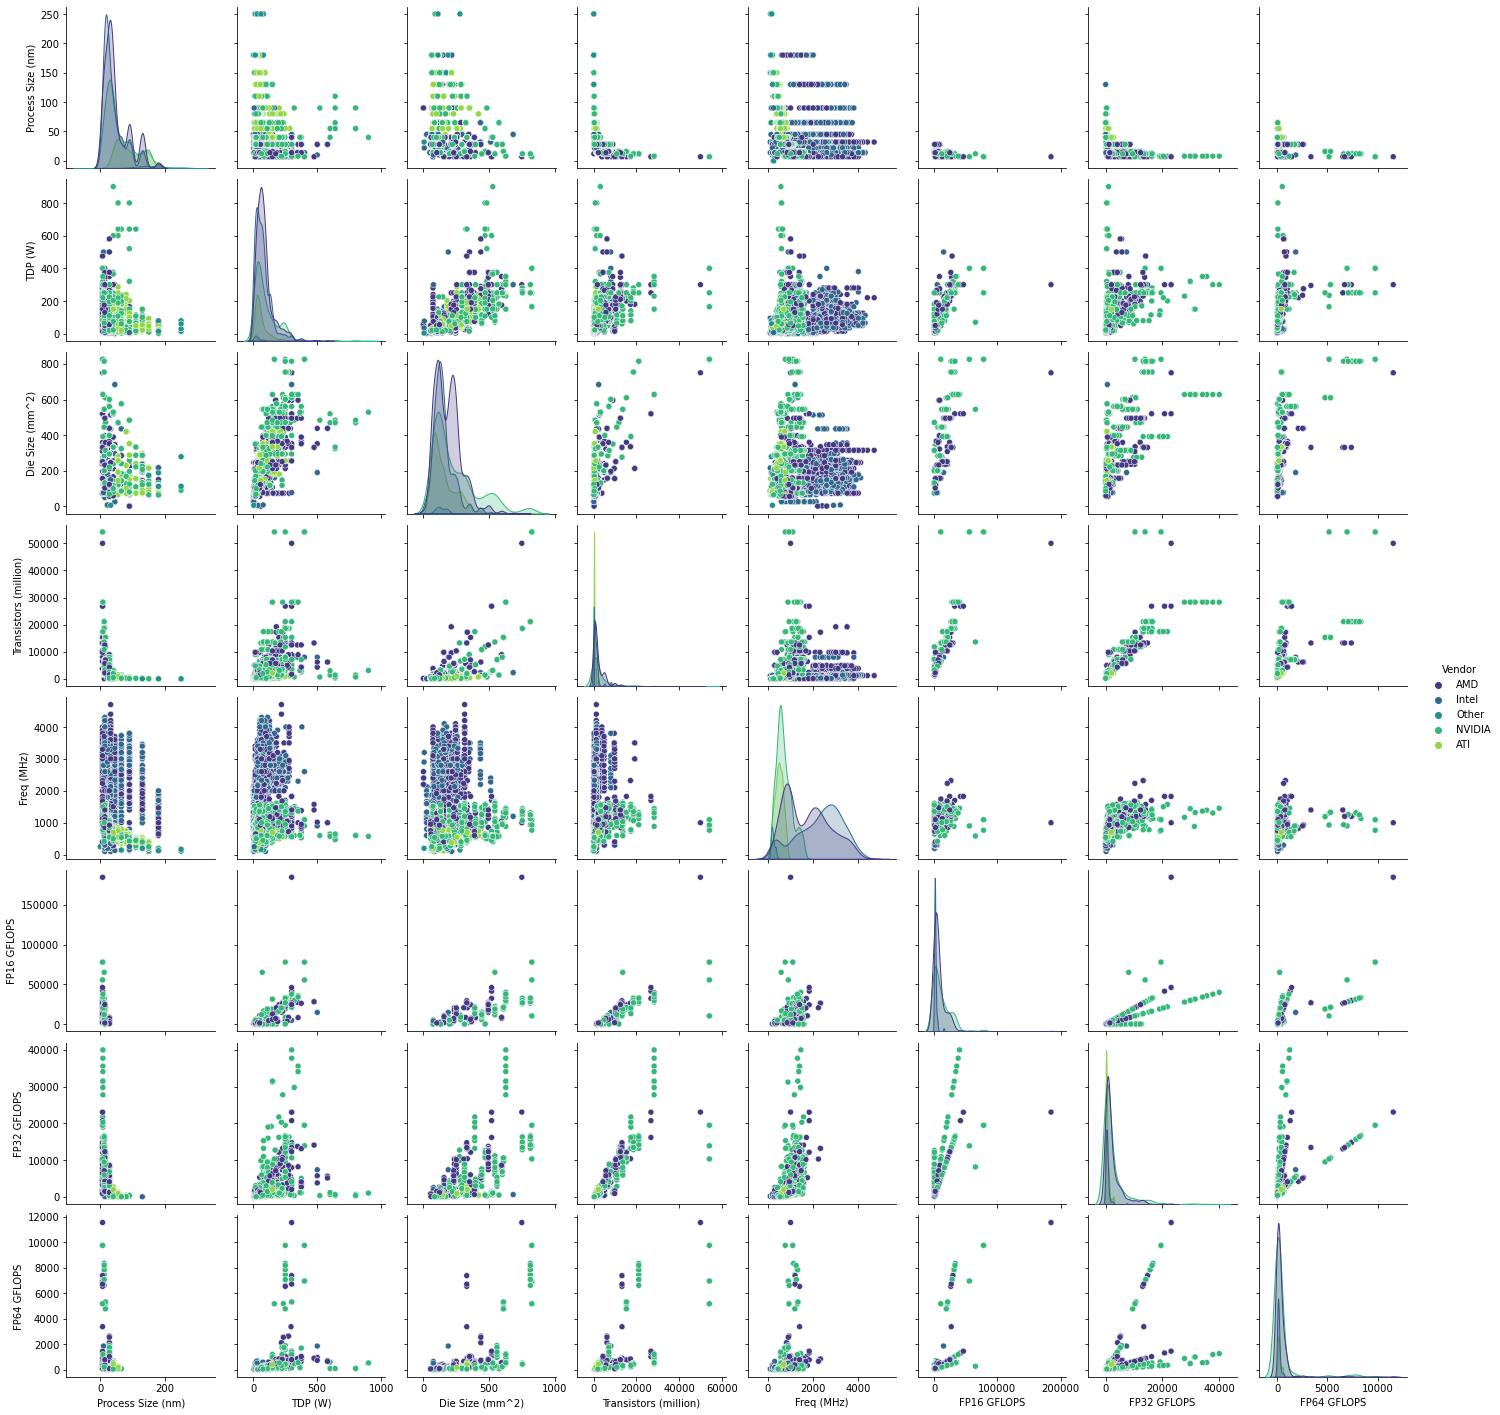

In [7]:
## Pairplot 
df_pair = chipdata.drop(['Unnamed: 0','Release Date','Product','Foundry'],axis=1)
sns.pairplot(data=df_pair, hue="Vendor", palette="viridis")

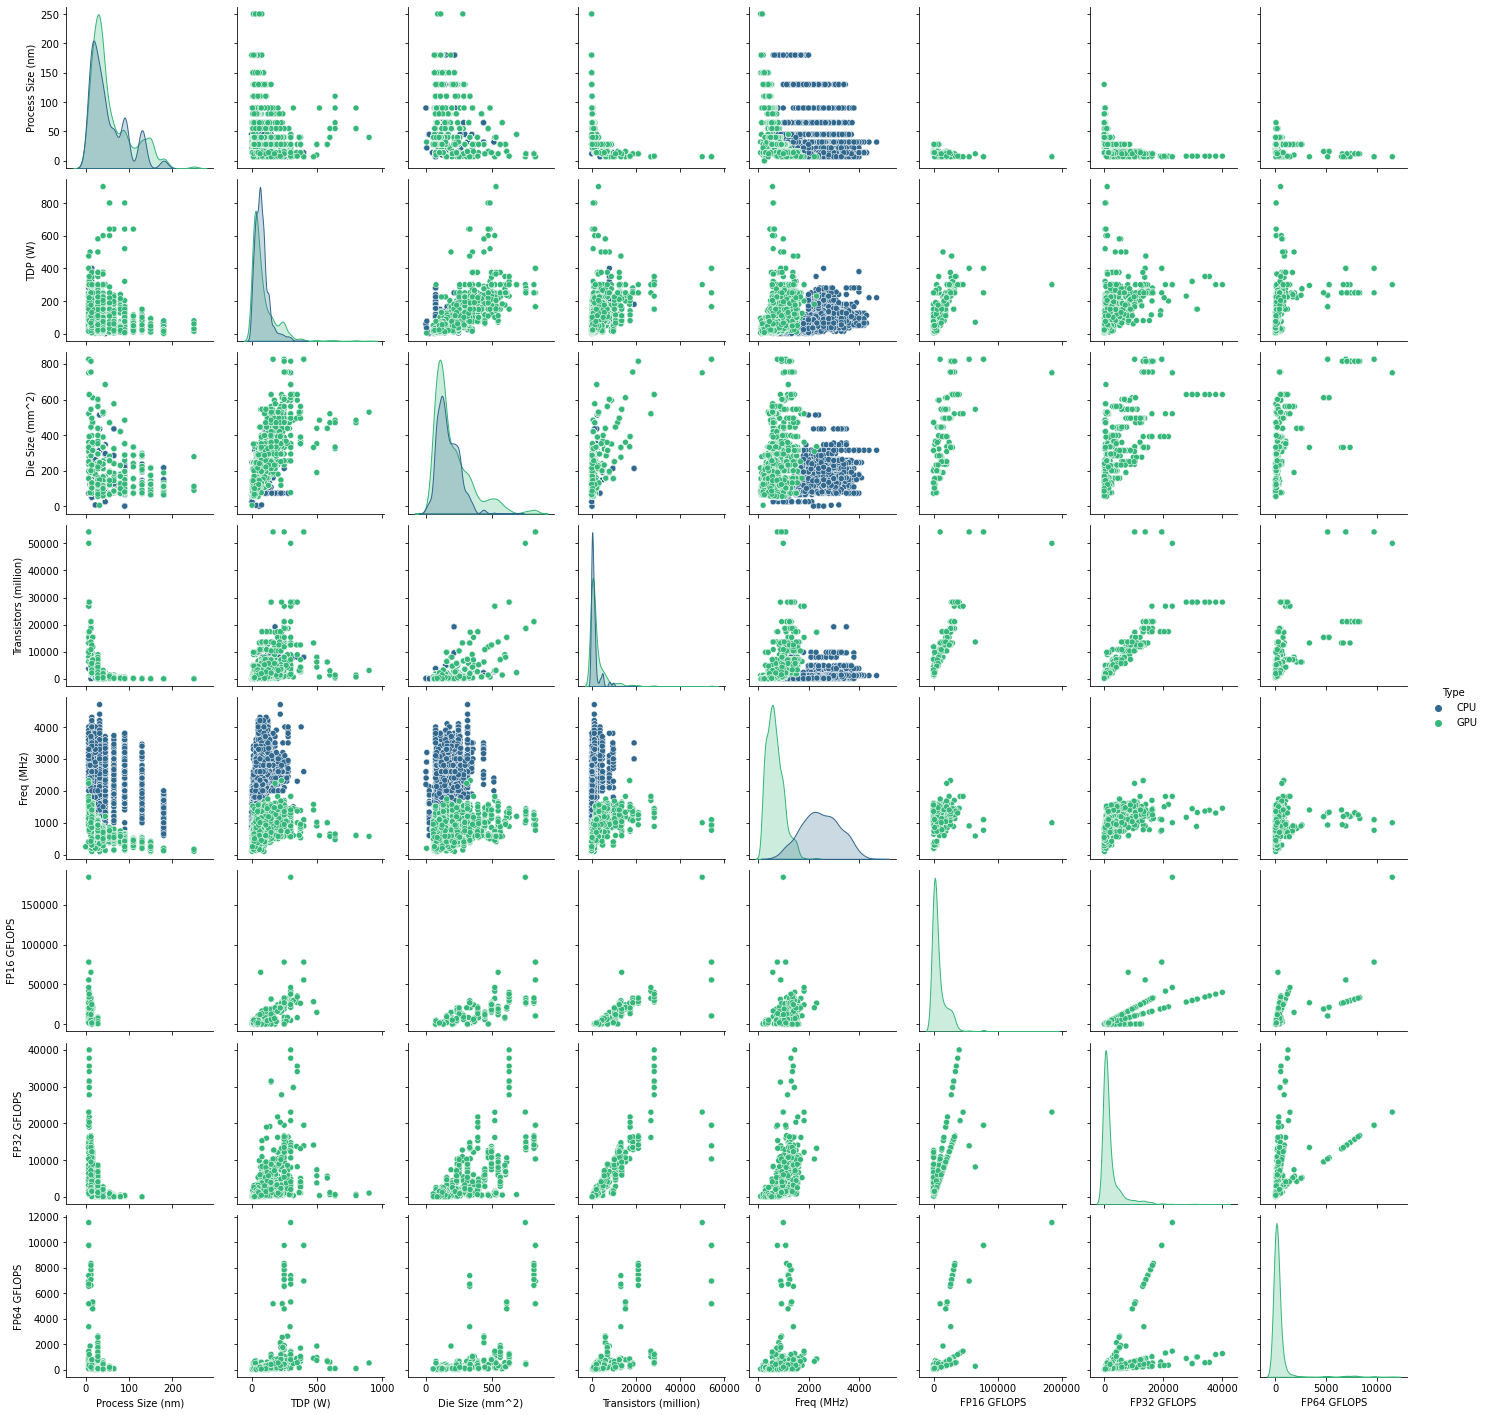

In [8]:
df_pair = chipdata.drop(['Unnamed: 0','Release Date','Product','Foundry'],axis=1)
sns.pairplot(data=df_pair, hue="Type", palette="viridis")

Text(0.5, 1.0, 'Missing Values Heatmap')

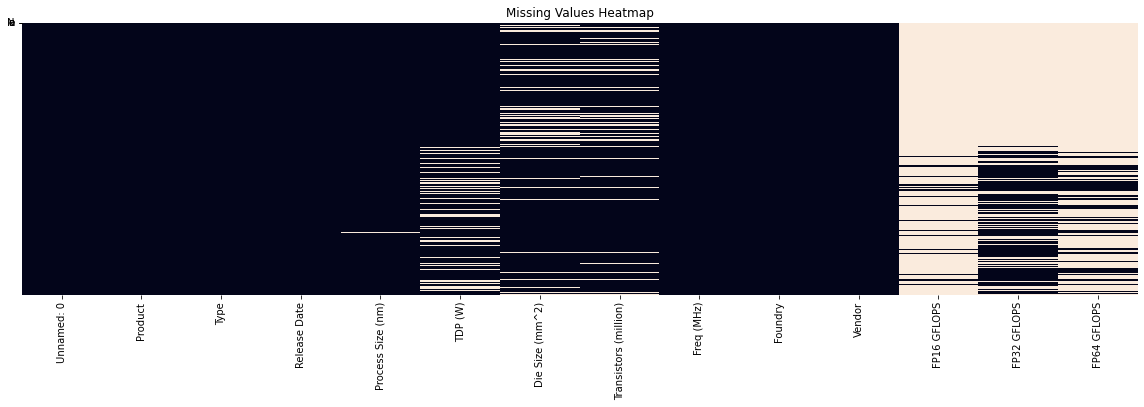

In [9]:
## DATA CLEANING 
plt.figure(figsize=(20,5))

sns.heatmap(chipdata.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

In [15]:
missing_values = chipdata.isnull().sum()
missing_percent = (missing_values / len(chipdata)) * 100
missing_percent.sort_values()

Unnamed: 0                0.000000
Product                   0.000000
Type                      0.000000
Release Date              0.000000
Freq (MHz)                0.000000
Foundry                   0.000000
Vendor                    0.000000
Process Size (nm)         0.185414
TDP (W)                  12.896580
Transistors (million)    14.647713
Die Size (mm^2)          14.730119
FP32 GFLOPS              59.868150
FP64 GFLOPS              73.094355
FP16 GFLOPS              88.957561
dtype: float64

In [16]:
# Drop columns with more than 50% missing values
threshold = 50  # Adjust this threshold based on your judgment
data_cleaned = chipdata.dropna(thresh=len(chipdata) - threshold*len(chipdata)/100, axis=1)

# Impute missing values in numerical columns with mean
numerical_cols = data_cleaned.select_dtypes(include=['float64']).columns
data_cleaned[numerical_cols] = data_cleaned[numerical_cols].fillna(data_cleaned[numerical_cols].mean())

# Impute missing values in categorical columns with mode
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned[categorical_cols] = data_cleaned[categorical_cols].fillna(data_cleaned[categorical_cols].mode().iloc[0])
# Convert a column to datetime format
data_cleaned['Release Date'] = pd.to_datetime(data_cleaned['Release Date'], format='%Y-%m-%d')

C:\Users\DE737AP\AppData\Local\Temp\ipykernel_45584\1369246414.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numerical_cols] = data_cleaned[numerical_cols].fillna(data_cleaned[numerical_cols].mean())
C:\Users\DE737AP\AppData\Local\Temp\ipykernel_45584\1369246414.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[categorical_cols] = data_cleaned[categorical_cols].fillna(data_cleaned[categorical_cols].mode().iloc[0])
C:\Users\DE737AP\AppData\Local\Temp\ipykernel_45584\1369246

Text(0.5, 1.0, 'Missing Values Heatmap')

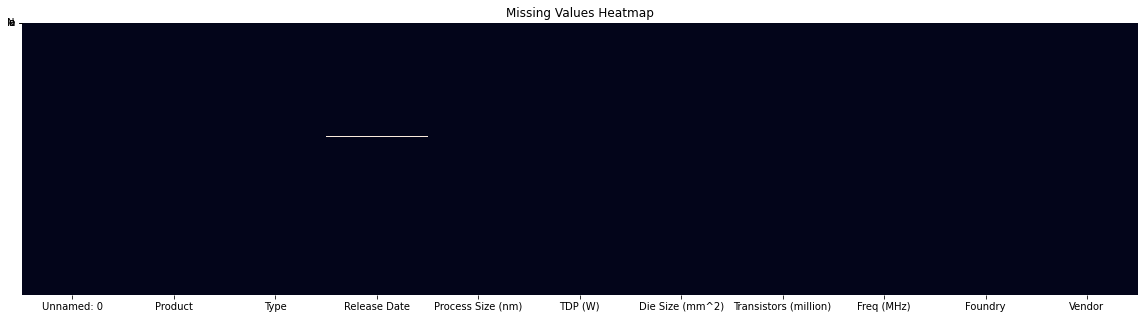

In [17]:
plt.figure(figsize=(20,5))

sns.heatmap(data_cleaned.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

In [23]:
data_cleaned["Type"].value_counts()
chipdata["Foundry"].value_counts()
chipdata["Vendor"].value_counts()

AMD       1662
Intel     1392
NVIDIA    1201
ATI        535
Other       64
Name: Vendor, dtype: int64

## INSIGHTS GATHERING FROM EDA 
# Assumption 1 Moore's Law still holds, especially in GPUs.
Moore's Law states that the number of transistors on a microchip doubles approximately every two years. To validate this assumption, observe if the "Transistors" attribute follows an upward trend over the years. If the number of transistors tends to double roughly every two years, it would support the validity of Moore's Law.


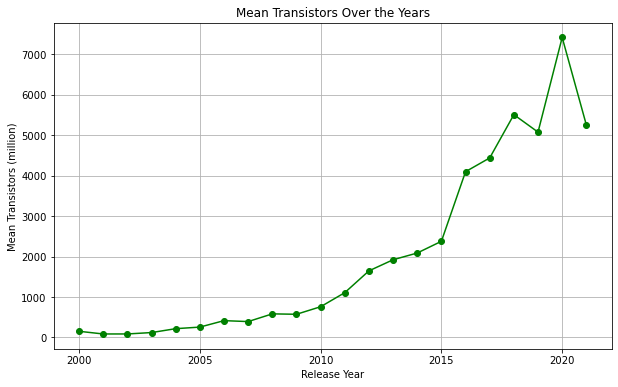

In [30]:
yearly_progress = data_cleaned.groupby(data_cleaned["Release Date"].dt.year)["Transistors (million)"].mean()
# Create a line plot of mean Transistors over the years
plt.figure(figsize=(10, 6))
yearly_progress.plot(color= 'green', marker="o")
plt.title("Mean Transistors Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Mean Transistors (million)")
plt.grid()
plt.show()